In [9]:
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42
prefix = "EXVIVO"

'EXVIVO_sparse.mtx'

In [10]:
#counts_matrix = scipy.io.mmread("/home/luisas/Desktop/cluster/proj/code/ebola/src/scripts/Analysis/results/sparse.mtx").T.tocsc()
robjectsdir = "/home/luisas/Desktop/cluster/data/RObjects"
counts_matrix = scipy.io.mmread( os.path.join(robjectsdir,prefix+"_sparse.mtx")).T.tocsc()
print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))


Counts matrix shape: 48141 rows, 12761 columns


In [11]:
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.06)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)
scrub.call_doublets(threshold=0.25)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.82
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.1%
Elapsed time: 66.6 seconds
Detected doublet rate = 4.3%
Estimated detectable doublet fraction = 41.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 10.4%


array([False, False, False, ..., False, False, False])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Running UMAP...


/home/luisas/.local/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../.local/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/luisas/.local/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../.local/lib/python3.6/site-packages/uma

Done


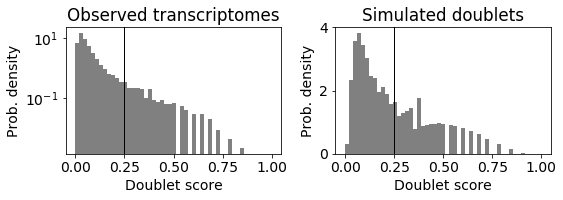

In [12]:
scrub.plot_histogram();
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
print('Done')

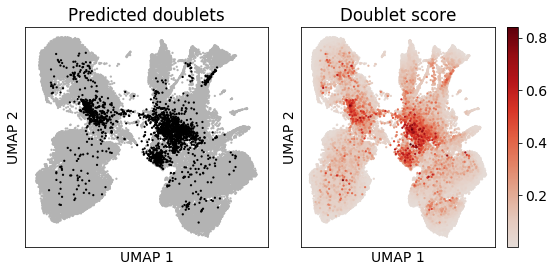

In [13]:
scrub.plot_embedding('UMAP', order_points=True);

In [18]:
np.savetxt( os.path.join(robjectsdir,prefix+"_predicted_doublet_mask.mtx"), scrub.predicted_doublets_, fmt='%s')

np.savetxt(os.path.join(robjectsdir,prefix+"_predicted_doublet_scores.txt"), scrub.doublet_scores_obs_, fmt='%s')
#np.savetxt('/home/luisas/Desktop/cluster/proj/code/ebola/src/scripts/Analysis/results/predicted_doublet_mask_rhemac10.txt', scrub.predicted_doublets_, fmt='%s')
#np.savetxt('/home/luisas/Desktop/cluster/proj/code/ebola/src/scripts/Analysis/results/predicted_doublet_scores_rhemac10.txt', scrub.doublet_scores_obs_, fmt='%s')